# INTRODUCCIÓN

Hoy vamos a estudiar las probabilidades del juego de beber: fuck the dealer, teniendo en cuenta jugadas independientes (no sacamos nunca cartas de la baraja)

Explicación del juego: un jugador es el dealer, el cual saca una carta aleatoria de la bajara. Otro jugador intenta adivinarla:


*   Si acierta: bebe el dealer.
*   Si falla: tiene otra oportunidad y el dealer debe decirle si la carta es mayor o menor al numero que acaba de decir.
* Si vuelve a fallar, bebe el jugador, si acierta, bebe el dealer.

El objetivo de este programa es estimar las funciones de densidad de probabilidad de A y B. Siendo:



*   A: acertar en el primer intento
*   B: acertar en el segundo intento



Constants:


*   1/12 = 0.0833
*   1/6 = 0.1666



## CALCULO TEORICO

¿Cual es el mejor numero a decir primero?

### Definición de variables
Lo más difícil en estos problemas es la definición. Si no definimos bien las variables y somos muy claros con ellas la cagaremos.

A = primer numero dicho

B = numero a acertar

V = Acierto a la primera

P(V) = 1/12

W = Acierto a la segunda

T = Acierto a la primera o a la segunda

P(W|A=a): probabilidad de acertar a la segunda conociendo A (A=a)

P(W|B>a): probabilidad de acertar a la segunda sabiendo que B > a

P(W|B<a): probabilidad de acertar a la segunda sabiendo que B < a



### Probabilidad condicionada
Probabilidad condicional es la probabilidad de que ocurra un evento A, sabiendo que también sucede otro evento B. La probabilidad condicional se escribe P(A|B) o P(A/B), y se lee «la probabilidad de A dado B».

### Teorema Probabilidad total
Supóngase que los sucesos A_1, A_2, ..., A_n forman una partición sobre el espacio muestral E, es decir, los sucesos A_j son incompatibles dos a dos y su unión forman al espacio muestral E, pues A_1 ∪ A_2 ∪ ... ∪ A_n = E.  Además,  P(A_j) > 0 para j = 1,...,n. Entonces, para cualquier suceso B de S:

P(B)=P(A_1)·P(B|A_1) + P(A_2)·P(B|A_2)+ ... + P(A_n)·P(B|A_n)


### Cálculo de la probabiliad
(B>a) U (B<a) suponen todo el espacio muestral, ya que B no puede ser a, pues si no, se hubiese acertado a la primera

Donde:

*   P(W|A=a): probabilidad de acertar a la segunda conociendo A (A=a)
*   P(W|B>a): probabilidad de acertar a la segunda sabiendo que B > a
* P(W|B<a): probabilidad de acertar a la segunda sabiendo que B < a

P(W|A=a) = P(W|B>a)·P(B>a) + P(W|B<a)·P(B<a) = (1/12-a)·(12-a/12) + (1/a-1)·(a-1/12)

Si simplificamos para a != 1,12...

P(W|A=a) = 1/12 + 1/12 = 1/6

Pero que pasa con a = 1 o a = 12... Tenemos denominadores = 0. Hay que hacer el calculo para estas excepciones:

*   P(W|A=1) = P(W|B>a)·P(B>a) + P(W|B<a)·P(B<a) = 1/11*1 + 0 = 1/11
*   P(W|A=12) = P(W|B>a)·P(B>a) + P(W|B<a)·P(B<a) = 0 + 1/11*1 = 1/11

Para todo a€{2,3,..10,11} se cumple P(W|A=a)=1/6


<========= RESULTADOS TEÓRICOS ===========>

Vector de probabilidades acertar a la primera en función de la 'a' que escojamos:
[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
Suma valores del vector, son independientes de a (comprobación) -->  1.0 

Vector de probabilidades acertar a la segunda en función de la 'a' que escojamos:
[0.09090909 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.09090909] 

Vector de probabilidades acertar en función de la 'a' que escojamos:
[0.17424242 0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.17424242] 




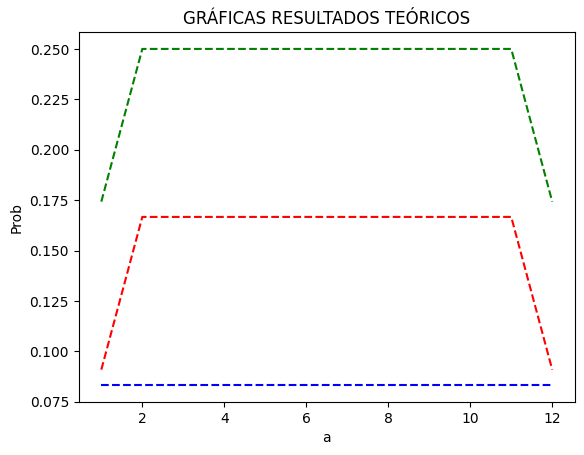

Blue: Probabilidad acertar a la primera en función de a escogida
Red: Probabilidad de acertar a la segunda en función de a escogida
Green: Probabilidad de acertar en función de a escogida


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import random as ran
import sys
from termcolor import colored, cprint

# Definición de variables
probs_A_TH = np.zeros(12) # Probabilidad teórica de acertar a la primera 
probs_B_TH = np.zeros(12) # Probabilidad teorica de acertar a la segunda en función del primer numero que escojamos
probs_tot_TH = np.zeros(12) # Probabilidad teorica de acertar

# Calculamos los vectores de probabilidad teorica por número.
for i in range(len(probs_A_TH)):
  probs_A_TH[i] = 1/12
  if (i+1 == 1 or i+1 == 12):
    probs_B_TH[i] = 1/11
  else:
    probs_B_TH[i] = 1/6
    
# Calculamos la probabilidad de acertar sumando las de acertar a la primera y las de acertar a la segunda
probs_tot_TH = np.add(probs_A_TH, probs_B_TH)

# Print de datos teoricos
print("<========= RESULTADOS TEÓRICOS ===========>\n")
print("Vector de probabilidades acertar a la primera en función de la 'a' que escojamos:")
print(probs_A_TH)
print("Suma valores del vector, son independientes de a (comprobación) --> ", sum(probs_A_TH), "\n")
print("Vector de probabilidades acertar a la segunda en función de la 'a' que escojamos:")
print(probs_B_TH,"\n")
print("Vector de probabilidades acertar en función de la 'a' que escojamos:")
print(probs_tot_TH,"\n\n")

# Gráficas teóricas
plt.title("GRÁFICAS RESULTADOS TEÓRICOS")
axis_x = range(1,13)
plt.plot(axis_x, probs_B_TH, 'r--', axis_x, probs_A_TH, 'b--', axis_x, probs_tot_TH, 'g--')
#plt.plot(axis_x, probs_B_TH, 'r--', label='Acertar a la segunda') 
#plt.plot(axis_x, probs_A_TH, 'b--', label='Acertar a la primera')
#plt.plot(axis_x, probs_tot_TH, 'g--', label='Acertar')
#plt.legend(loc='best')
plt.ylabel('Prob')
plt.xlabel('a')
plt.show()
print("Blue: Probabilidad acertar a la primera en función de a escogida")
print("Red: Probabilidad de acertar a la segunda en función de a escogida")
print("Green: Probabilidad de acertar en función de a escogida")

7.8e-11


## ESTIMACIÓN EMPIRICA

Para estimar los resultados anteriores, vamos a hacer una prueba empirica de "iterations" realizaciones del experimiento. A ver que sucede...

<========= ESTIMACIÓN EMPÍRICA 1000000 ITERACIONES ===========>

Vector de probabilidades acertar a la primera en función de la 'a' que escojamos:
[0.08267934 0.08403533 0.08363933 0.08594331 0.08365233 0.08241633
 0.08211633 0.08406034 0.08275233 0.08318433 0.08355633 0.08349633] 

Vector de probabilidades acertar a la segunda en función de la 'a' que escojamos:
[0.08350733 0.16611467 0.16679867 0.16636667 0.16654867 0.16562466
 0.16884068 0.16636867 0.16569666 0.16740067 0.16864867 0.08374833] 

Vector de probabilidades acertar en función de la 'a' que escojamos:
[0.16618667 0.25015    0.250438   0.25230998 0.250201   0.24804099
 0.250957   0.250429   0.24844899 0.250585   0.25220501 0.16724467] 




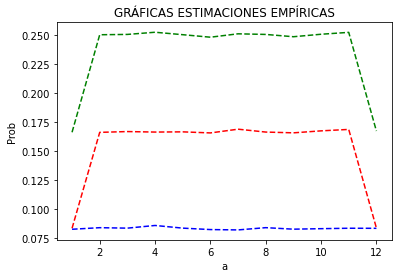

Blue: Probabilidad acertar a la primera en función de a escogida
Red: Probabilidad de acertar a la segunda en función de a escogida
Green: Probabilidad de acertar en función de a escogida


In [ ]:
# Definición de variables a calcular empiricamente
hits_A = np.zeros(12) # Aciertos a la primera
hits_B = np.zeros(12) # Aciertos a la segunda
hits_tot= np.zeros(12) # Aciertos
tests = np.zeros(12) # Intentos con cada numero
probs_A = np.zeros(12) # Probabilidad de acertar a la primera 
probs_B = np.zeros(12) # Probabilidad de acertar a la segunda en función del primer numero que escojamos
probs_tot = np.zeros(12) # Probabilidad de acertar

# Funcion experimento fuck the dealer
def fdealer_exp(num):
  '''
  Function to execute fuck the dealer experiment
  - param: number to test
  - return: 0 if fails, 1 if hit at the first try, 2 if hit at the second try
  '''
  if (r == num): # Si se acierta a la primera
    return 1
  elif (r > num): # Si el numero es más grande
    r_2 = ran.randrange(num+1,12+1); # Generamos otro numero aleatorio entre nuestro numero y 12 para probar de nuevo
    if (r == r_2): # Si acertamos a la segunda
      return 2
  else:
    r_2 = ran.randrange(1,num); # Generamos otro numero aleatorio entre 1 y nuestro numero -1 para probar de nuevo
    if (r == r_2): # Si acertamos a la segunda
      return 2
  return 0

# # Hacemos el experimento iterations veces
# ## Si es multiplo de 12 mejor, así todos los numeros se habrán probado el mismo
# ## numero de veces --> iterations/12
iterations = int(1e6)
for i in range(iterations): 
  num = i%12 + 1 # Vamos probando ordenadamente cada vez un numero del 1 al 12
  r = ran.randrange(1,12+1) # Generamos aleatoriamente el numero a adivinar
  tests[num-1] += 1 
  res = fdealer_exp(num) 
  if (res == 1): # Si se acierta a la primera
    hits_A[num-1] += 1
    hits_tot[num-1] += 1
  if (res == 2): # Si se acierta a la segunda
    hits_B[num-1] += 1
    hits_tot[num-1] += 1  
  # if (i%(iterations)/10) == 0):
  #   print(i)


# Calculamos los vectores de probabilidad empíricos por número
probs_A = np.divide(hits_A, tests)
probs_B = np.divide(hits_B, tests)
probs_tot = np.divide(hits_tot, tests)

# Print de estimaciones empíricas
print("<========= ESTIMACIÓN EMPÍRICA", iterations, "ITERACIONES ===========>\n")
print("Vector de probabilidades acertar a la primera en función de la 'a' que escojamos:")
print(probs_A,"\n")
print("Vector de probabilidades acertar a la segunda en función de la 'a' que escojamos:")
print(probs_B,"\n")
print("Vector de probabilidades acertar en función de la 'a' que escojamos:")
print(probs_tot,"\n\n")

# Gráficas empíricas
plt.title("GRÁFICAS ESTIMACIONES EMPÍRICAS")
axis_x = range(1,13)
plt.plot(axis_x, probs_B, 'r--', axis_x, probs_A, 'b--', axis_x, probs_tot, 'g--')
#plt.plot(axis_x, probs_B, 'r--', label='Acertar a la segunda') 
#plt.plot(axis_x, probs_A, 'b--', label='Acertar a la primera')
#plt.plot(axis_x, probs_tot, 'g--', label='Acertar')
#plt.legend(loc='best')
plt.ylabel('Prob')
plt.xlabel('a')
plt.show()
print("Blue: Probabilidad acertar a la primera en función de a escogida")
print("Red: Probabilidad de acertar a la segunda en función de a escogida")
print("Green: Probabilidad de acertar en función de a escogida")



## Comparativa

<========= COMPARATIVA 1000000 ITERACIONES ===========>

Probabilidades/Estimación de acertar a la primera en función de la 'a' que escojamos:
a =  i : theor   -  estim
-----------------------------
a =  1 : 0.0833  -  0.0832
a =  2 : 0.0833  -  0.084
a =  3 : 0.0833  -  0.0828
a =  4 : 0.0833  -  0.0844
a =  5 : 0.0833  -  0.0837
a =  6 : 0.0833  -  0.0825
a =  7 : 0.0833  -  0.0837
a =  8 : 0.0833  -  0.084
a =  9 : 0.0833  -  0.0833
a =  10 : 0.0833  -  0.085
a =  11 : 0.0833  -  0.0842
a =  12 : 0.0833  -  0.0822

Probabilidades/Estimación acertar a la segunda en función de la 'a' que escojamos:
a =  i : theor   -  estim
-----------------------------
a =  1 : 0.0909  -  0.0818
a =  2 : 0.1667  -  0.1681
a =  3 : 0.1667  -  0.1675
a =  4 : 0.1667  -  0.1675
a =  5 : 0.1667  -  0.1683
a =  6 : 0.1667  -  0.167
a =  7 : 0.1667  -  0.1673
a =  8 : 0.1667  -  0.1667
a =  9 : 0.1667  -  0.1651
a =  10 : 0.1667  -  0.1652
a =  11 : 0.1667  -  0.1662
a =  12 : 0.0909  -  0.0823

Probabilid

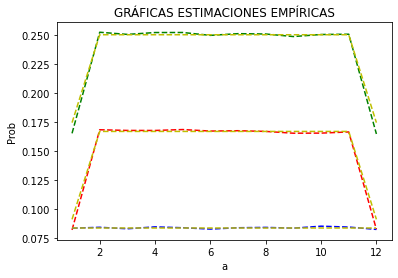

Blue -: Probabilidad teórica acertar a la primera en función de 'a' escogida
Blue o: Estimación probabilidad acertar a la primera en función de 'a' escogida
Red -: Probabilidad teórica de acertar a la segunda en función de 'a' escogida
Red o: Estimación probabilidad de acertar a la segunda en función de 'a' escogida
Green -: Probabilidad teórica de acertar en función de 'a' escogida
Green o: Estimación probabilidad de acertar en función de 'a' escogida


In [ ]:
# Print comparativa
print("<========= COMPARATIVA", iterations, "ITERACIONES ===========>\n")
print("Probabilidades/Estimación de acertar a la primera en función de la 'a' que escojamos:")
print("a = ", "i" , ":", "theor ", " - ", "estim")
print("-----------------------------")
for i in range(len(probs_A_TH)):
  print("a = ", i+1 , ":", round(probs_A_TH[i],4), " - ", round(probs_A[i],4))

print("\nProbabilidades/Estimación acertar a la segunda en función de la 'a' que escojamos:")
print("a = ", "i" , ":", "theor ", " - ", "estim")
print("-----------------------------")
for i in range(len(probs_A_TH)):
  print("a = ", i+1 , ":", round(probs_B_TH[i],4), " - ", round(probs_B[i],4))

print("\nProbabilidades/Estimación acertar en función de la 'a' que escojamos:")
print("a = ", "i" , ":", "theor ", " - ", "estim")
print("-----------------------------")
for i in range(len(probs_A_TH)):
  print("a = ", i+1 , ":", round(probs_tot_TH[i],4), " - ", round(probs_tot[i],4))
print("\n")

# Gráficas comparativas
plt.title("GRÁFICAS ESTIMACIONES EMPÍRICAS")
axis_x = range(1,13)
plt.plot(axis_x, probs_B, 'r--', axis_x, probs_A, 'b--', axis_x, probs_tot, 'g--')
plt.plot(axis_x, probs_B_TH, 'y--', axis_x, probs_A_TH, 'y--', axis_x, probs_tot_TH, 'y--')
#plt.plot(axis_x, probs_B, 'r--', label='Acertar a la segunda') 
#plt.plot(axis_x, probs_A, 'b--', label='Acertar a la primera')
#plt.plot(axis_x, probs_tot, 'g--', label='Acertar')
#plt.legend(loc='best')
plt.ylabel('Prob')
plt.xlabel('a')
plt.show()
print("Blue -: Probabilidad teórica acertar a la primera en función de 'a' escogida")
print("Blue o: Estimación probabilidad acertar a la primera en función de 'a' escogida")
print("Red -: Probabilidad teórica de acertar a la segunda en función de 'a' escogida")
print("Red o: Estimación probabilidad de acertar a la segunda en función de 'a' escogida")
print("Green -: Probabilidad teórica de acertar en función de 'a' escogida")
print("Green o: Estimación probabilidad de acertar en función de 'a' escogida")

## MSE

Ahora vamos a calcular el MSE para el numero de iteraciones escogido

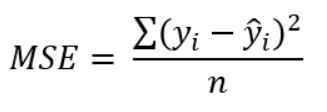

In [ ]:
# Function to calculate error vector and MSE
def calc_mse(probs_TH, probs):
  '''
  Calculates the mean square error between 2 vectors
  - param1: ground truth vector
  - param2: vector to calculate MSE
  - return: (error_vector, mse)
  '''
  vec_err = np.zeros(12)
  for i in range(len(vec_err)):
    vec_err[i] = (probs_TH[i]-probs[i])**2
  return (vec_err, sum(vec_err) / len(vec_err))

# Calculate MSE para el experimento T = Acierto a la primera o a la segunta
(vec_err_tot, mse) = calc_mse(probs_tot_TH, probs_tot)
#(_,mse_toty) = calc_mse(probs_tot_TH, probs_tot)

# Prints
print("Error vector for ", iterations, "iteraciones:")
print(vec_err_tot)
print("\nMSE para",iterations,"iteraciones:",mse)

Error vector for  1000000 iteraciones:
[6.48951683e-05 2.24996400e-08 1.91840931e-07 5.33601462e-06
 4.04013232e-08 3.83771170e-06 9.15856327e-07 1.84042472e-07
 2.40562024e-06 3.42227738e-07 4.86206390e-06 4.89685787e-05]

MSE para 1000000 iteraciones: 1.1000168823344584e-05


## ITERACIONES PARA MSE EXPERIMENTO T MÁS PEQUEÑO QUE 1e-12



In [ ]:
MSE_MAX = 1e-6
tests_mse = np.zeros(12)
hits_mse = np.zeros(12)
probs_mse = np.zeros(12)
mse_vector = np.array([])
step = 1200

i = 0
mse_tot = 100
max_rep = int(20e6)
while (mse_tot > MSE_MAX and i<max_rep):
  num = i%12 + 1 # Vamos probando ordenadamente cada vez un numero del 1 al 12
  r = ran.randrange(1,12+1) # Generamos aleatoriamente el numero a adivinar
  tests_mse[num-1] += 1 
  res = fdealer_exp(num) 
  if (res != 0): # Si se acierta
    hits_mse[num-1] += 1
  # Si hemos hecho 12 iteraciones, calcular MSE
  if (i != 0 and i%step == 0):
    # Calculamos los vectores de probabilidad empíricos por número cada 12 iteraciones
    probs_mse = np.divide(hits_mse, tests_mse)
    (_,mse_tot) = calc_mse(probs_tot_TH, probs_mse)
    mse_vector = np.append(mse_vector, mse_tot)
  i += 1
  if (i%int(1e6) == 0):
    print("ITERATION:",i)

print("============ MSE DATA ==========")
print("Iteraciones para obtener MSE menor a:",MSE_MAX,"-->", i)
print("MSE final obtenido:", mse_tot)

print("============ COMPARISON MSE's ==========")
print("\n for - iteraciones:", iterations,"-","MSE:",mse)
print("\n while - iteraciones:", i,"-","MSE:",mse_tot)

ITERATION: 1000000
ITERATION: 2000000
ITERATION: 3000000
ITERATION: 4000000
ITERATION: 5000000
ITERATION: 6000000
ITERATION: 7000000
ITERATION: 8000000
ITERATION: 9000000
ITERATION: 10000000
ITERATION: 11000000
ITERATION: 12000000
ITERATION: 13000000
ITERATION: 14000000
ITERATION: 15000000
ITERATION: 16000000
ITERATION: 17000000
ITERATION: 18000000
ITERATION: 19000000
ITERATION: 20000000
============ MSE DATA ==========
Iteraciones para obtener MSE menor a: 1e-06 --> 20000000
MSE final obtenido: 9.72074919578398e-06
============ COMPARISON MSE's ==========

 for - iteraciones: 1000000 - MSE: 1.1000168823344584e-05

 while - iteraciones: 20000000 - MSE: 9.72074919578398e-06


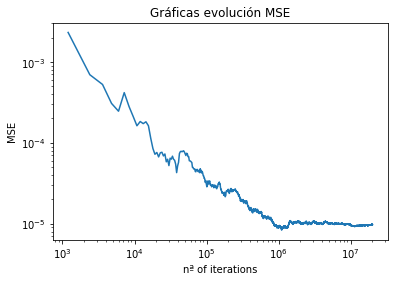

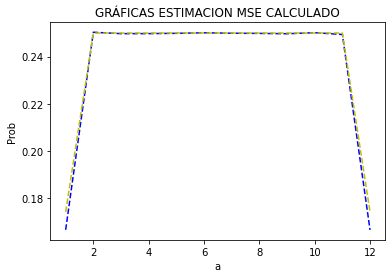

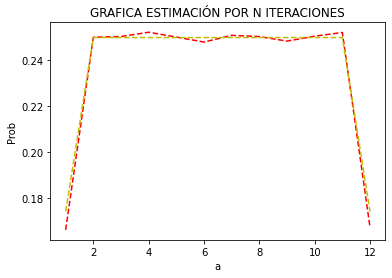

In [ ]:
# Gráficas evolución MSE
plt.title("Gráficas evolución MSE")
vec = np.linspace(step, i+1, len(mse_vector))
plt.xscale("log")
plt.yscale("log")
plt.plot(vec,mse_vector)
plt.ylabel('MSE')
plt.xlabel('nª of iterations')
plt.show()

# Gráficas comparativas
plt.title("GRÁFICAS ESTIMACION MSE CALCULADO")
axis_x = range(1,13)
plt.plot(axis_x, probs_mse, 'b--', axis_x, probs_tot_TH,'y--')
plt.ylabel('Prob')
plt.xlabel('a')
plt.show()

plt.title("GRAFICA ESTIMACIÓN POR N ITERACIONES")
axis_x = range(1,13)
plt.plot(axis_x, probs_tot, 'r--', axis_x, probs_tot_TH,'y--')
plt.ylabel('Prob')
plt.xlabel('a')
plt.show()